In [1]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, kstest, norm
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')

In [2]:
# 結果を再現可能にするためのシード値の設定
np.random.seed(42)

# サンプルサイズを設定
n = 50

# 正規分布データ
normal_data = np.random.randn(n)

# 二項分布データ（正規分布に従わない）
binomial_data = np.random.binomial(n=1, p=0.5, size=n)

# 対数正規分布データ（正規分布に従わない）
# mean (mu) と standard deviation (sigma) のパラメータを設定
mu, sigma = 0, 0.3
lognormal_data = np.random.lognormal(mean=mu, sigma=sigma, size=n)

# データをデータフレームに格納
df = pd.DataFrame({
    'normal': normal_data,
    'binomial': binomial_data,
    'lognormal': lognormal_data
})

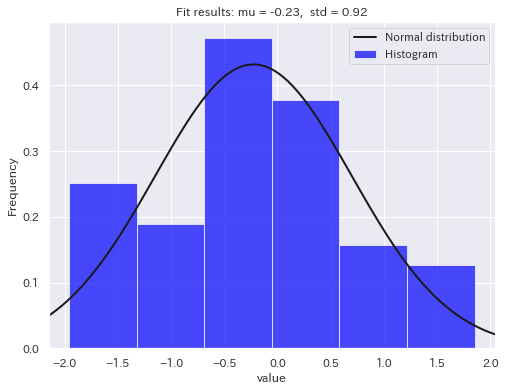

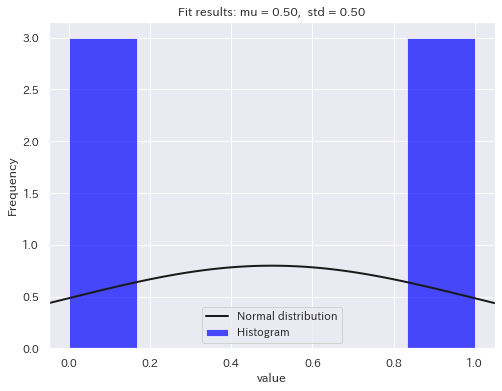

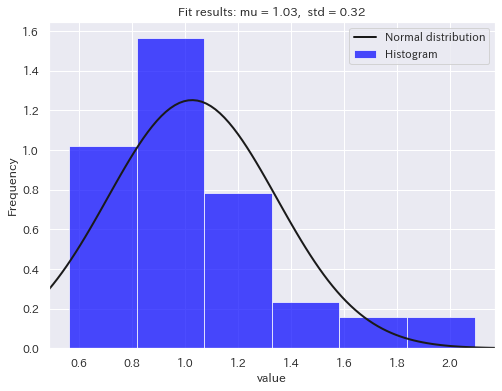

In [3]:
# ヒストグラムと正規分布の曲線を描画
for col in df.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    df_col = df[col].dropna()
    # ヒストグラムのbinの数を計算（スタージェスの公式）
    num_bins = int(np.log2(len(df_col)) + 1)
    
    # ヒストグラム
    ax.hist(df_col, bins=num_bins, density=True, alpha=0.7, color='blue', label='Histogram')
    
    # 正規分布曲線の描画
    xmin, xmax = ax.set_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = norm.fit(df_col)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label='Normal distribution')
    ax.set_xlabel('value')
    ax.set_ylabel('Frequency')
    
    title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
    ax.set_title(title)
    plt.legend()
    plt.show()
    fig.savefig(f'{col}_histogram.png', dpi=100)
    plt.close(fig)

In [4]:
# 結果を格納するデータフレームを作成
results = pd.DataFrame(columns=['column', 'pvalue', 'sample_size'])

# シャピロ・ウィルク検定
for col in df.columns:
    df_col = df[col].dropna()
    _, pvalue = shapiro(df_col)
    sample_size = len(df_col)
    
    # 結果をデータフレームに追加
    results = results.append({'column': col, 'pvalue': pvalue, 'sample_size': sample_size}, ignore_index=True)

# データフレームをエクセルに保存
results.to_excel('shapiro_wilk_test_results.xlsx', index=False)

In [5]:
# 結果を格納するデータフレームを作成
results = pd.DataFrame(columns=['column', 'pvalue', 'sample_size'])

# コルモゴロフ・スミルノフ検定
for col in df.columns:
    df_col = df[col].dropna()
    
    # データの平均と標準偏差を計算
    mean = df_col.mean()
    std = df_col.std(ddof=1)
    
    # 標準正規分布の平均と標準偏差を調整して検定
    result = kstest(df_col, 'norm', args=(mean, std))
    pvalue = result[1]
    sample_size = len(df_col)
    
    # 結果をデータフレームに追加
    results = results.append({'column': col, 'pvalue': pvalue, 'sample_size': sample_size}, ignore_index=True)

# データフレームをエクセルに保存
results.to_excel('kolmogorov_smirnov_test_results.xlsx', index=False)